In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import statsmodels.api as sm

## investigating volatility linkages between oil, gas, and regionalised coal futures markets ##

## load data from Github into new frame and remove rows with absent data ##

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/df-combined.csv'
df = pd.read_csv(url)
df["DATE"] = pd.to_datetime(df["DATE"])
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col],errors='coerce')

df = df.dropna()

In [2]:
## calculating univariate returns ##

for col in df.columns[1:5]:
    df[col+'_r'] = df[col].pct_change()
    
df = df.dropna()
print(df)

           DATE    NCF    RCF    WTI    HH     NCF_r     RCF_r     WTI_r  \
4    2009-05-01  77.65  84.40  48.61  5.83  0.044385  0.041975  0.052848   
5    2009-06-01  81.25  88.50  48.56  6.10  0.046362  0.048578 -0.001029   
6    2009-07-01  78.65  86.25  42.75  5.89 -0.032000 -0.025424 -0.119646   
7    2009-08-01  79.15  84.00  41.68  5.96  0.006357 -0.026087 -0.025029   
8    2009-09-01  76.90  83.50  40.69  5.60 -0.028427 -0.005952 -0.023752   
...         ...    ...    ...    ...   ...       ...       ...       ...   
4254 2020-08-25  49.75  48.90  43.17  2.54  0.001006  0.002049  0.017201   
4255 2020-08-26  49.70  48.95  43.21  2.52 -0.001005  0.001022  0.000927   
4256 2020-08-27  49.80  48.90  42.88  2.52  0.002012 -0.001021 -0.007637   
4257 2020-08-28  50.60  52.20  42.96  2.46  0.016064  0.067485  0.001866   
4260 2020-08-31  51.95  52.90  42.61  2.30  0.026680  0.013410 -0.008147   

          HH_r  
4     0.077634  
5     0.046312  
6    -0.034426  
7     0.011885  
8 

           DATE    NCF    RCF    WTI    HH     NCF_r     RCF_r     WTI_r  \
4    2009-05-01  77.65  84.40  48.61  5.83  0.044385  0.041975  0.052848   
5    2009-06-01  81.25  88.50  48.56  6.10  0.046362  0.048578 -0.001029   
6    2009-07-01  78.65  86.25  42.75  5.89 -0.032000 -0.025424 -0.119646   
7    2009-08-01  79.15  84.00  41.68  5.96  0.006357 -0.026087 -0.025029   
8    2009-09-01  76.90  83.50  40.69  5.60 -0.028427 -0.005952 -0.023752   
...         ...    ...    ...    ...   ...       ...       ...       ...   
4253 2020-08-24  49.70  48.80  42.44  2.57 -0.002008  0.003083  0.002836   
4254 2020-08-25  49.75  48.90  43.17  2.54  0.001006  0.002049  0.017201   
4255 2020-08-26  49.70  48.95  43.21  2.52 -0.001005  0.001022  0.000927   
4257 2020-08-28  50.60  52.20  42.96  2.46  0.016064  0.067485  0.001866   
4260 2020-08-31  51.95  52.90  42.61  2.30  0.026680  0.013410 -0.008147   

          HH_r  hhncfratio  
4     0.077634    1.749118  
5     0.046312    0.998928  


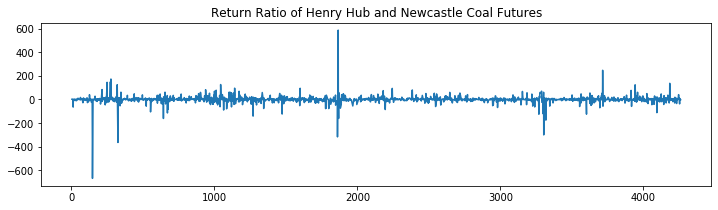

In [4]:
## markov regime switching for Henry Hub and Newcastle Gas Futures##

df['hhncfratio'] = df['HH_r']/df['NCF_r']
df = df.dropna()
df = df[(df != 0).all(1)]
print(df)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col],errors='coerce')
    
df['hhncfratio'].plot(title='Return Ratio of Henry Hub and Newcastle Coal Futures', figsize=(12,3))

In [5]:
modhh_ncf = sm.tsa.MarkovRegression(df.HH_r[1:], k_regimes=2)

res_hh_ncf = modhh_ncf.fit()
res_hh_ncf.summary()

C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\statsmodels\tsa\regime_switching\markov_regression.py:307: RuntimeWarning: invalid value encountered in subtract
  variance = np.var(self.endog - np.dot(self.exog, beta))
C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\statsmodels\tsa\regime_switching\markov_regression.py:312: RuntimeWarning: invalid value encountered in multiply
  beta * (i / self.k_regimes))
C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\statsmodels\tsa\regime_switching\markov_regression.py:172: RuntimeWarning: invalid value encountered in subtract
  return self.endog - predict
C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  la

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                   HH_r   No. Observations:                 2123
Model:               MarkovRegression   Log Likelihood                     nan
Date:                Mon, 15 Feb 2021   AIC                                nan
Time:                        16:00:40   BIC                                nan
Sample:                             0   HQIC                               nan
                               - 2123                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2            nan        nan        nan        nan         nan         nan
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]           nan        nan        nan        nan         nan         nan
p[1->0]           nan        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix is singular or near-singular, with condition number    nan. Standard errors may be unstable.
"""

In [ ]:
res_hh_ncf.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in the high regime', figsize=(12,3))

## OLS on volatility output ##

df["NCF_vol"] = sm.add_constant(df["NCF_vol"])
mod1 = sm.OLS(df["WTI_vol"][1:],df["NCF_vol"].dropna())
results = mod1.fit()
print(results.summary())